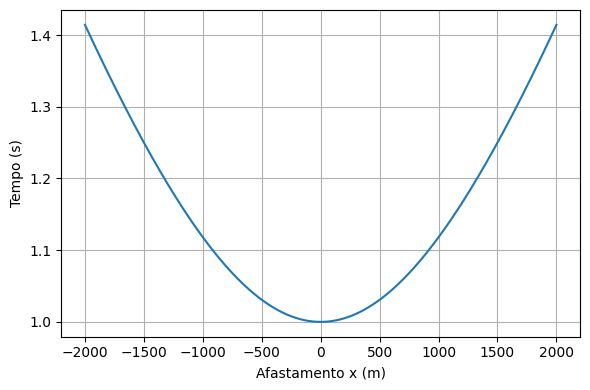

In [42]:
import numpy as np
import matplotlib.pyplot as plt

z = 1000  # profundidade em metros
v = 2000  # velocidade em m/s
x = np.linspace(-2000, 2000, 500)
T = np.sqrt(x**2 + 4*z**2) / v

plt.figure(figsize=(6,4))
plt.plot(x, T)
plt.xlabel('Afastamento x (m)')
plt.ylabel('Tempo (s)')
plt.grid(True)
plt.tight_layout()
# plt.savefig('refletor_horizontal.png', dpi=300)
plt.show()

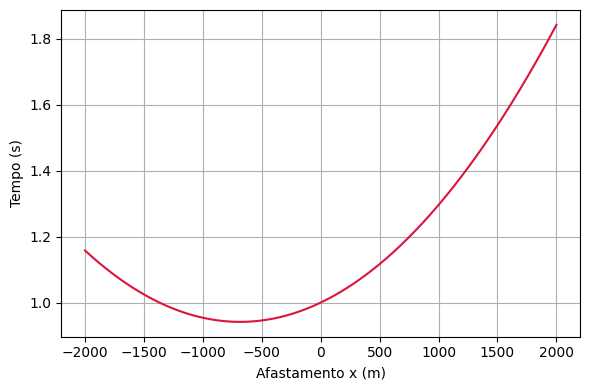

In [43]:
import numpy as np
import matplotlib.pyplot as plt

def tempo_inclinado(x, z=1000, v=2000, theta=np.radians(20)):
    T0 = 2 * z / v
    return T0 + (x**2 + 4 * x * z * np.sin(theta)) / (2 * v**2 * T0)

x = np.linspace(-2000, 2000, 500)
T_inclinado = tempo_inclinado(x)

plt.figure(figsize=(6,4))
plt.plot(x, T_inclinado, label='Inclinado (20°)', color='crimson')
plt.xlabel('Afastamento x (m)')
plt.ylabel('Tempo (s)')
plt.grid(True)
plt.tight_layout()
# plt.savefig('refletor_inclinado.png', dpi=300)
plt.show()

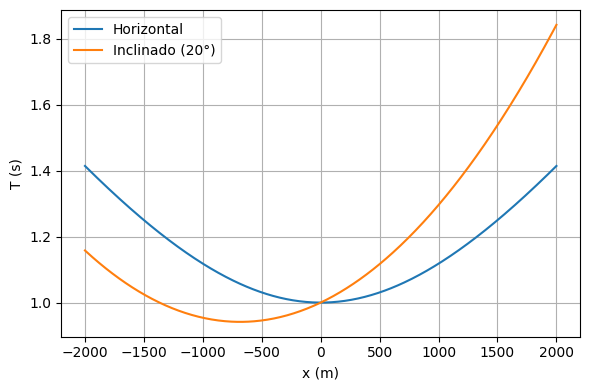

In [44]:
def tempo_inclinado(x, z=1000, v=2000, theta_deg=20):
    from numpy import sin, deg2rad
    theta = deg2rad(theta_deg)
    T0 = 2 * z / v
    return T0 + (x**2 + 4*x*z*sin(theta)) / (2 * v**2 * T0)

T_incl = tempo_inclinado(x)

plt.figure(figsize=(6,4))
plt.plot(x, T, label='Horizontal')
plt.plot(x, T_incl, label='Inclinado (20°)')
plt.legend()
plt.xlabel('x (m)')
plt.ylabel('T (s)')
plt.grid(True)
plt.tight_layout()
# plt.savefig('comparacao_refletores.png', dpi=300)
plt.show()

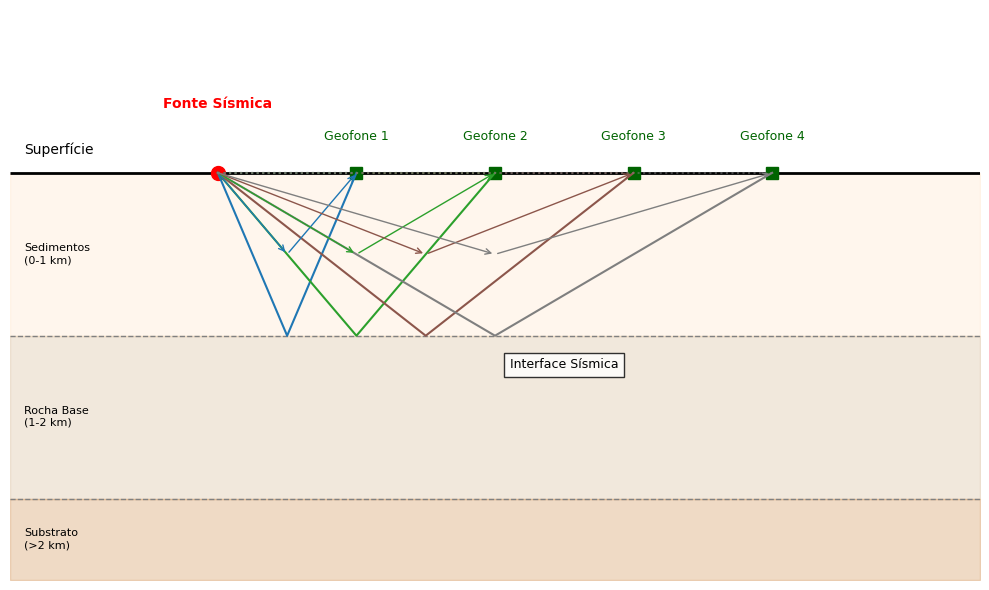

In [45]:
# Configuração da figura
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_xlim(-2, 12)
ax.set_ylim(-2.5, 1.0)  # Ajustado para melhor proporção

# Superfície terrestre
surface = ax.hlines(0, -2, 12, color='black', linewidth=2)
ax.text(-1.8, 0.1, 'Superfície', fontsize=10, va='bottom')

# Fonte sísmica (com efeito de explosão)
ax.plot(1, 0, 'ro', markersize=10)
ax.text(1, 0.4, 'Fonte Sísmica', color='r', ha='center', fontsize=10, weight='bold')

# Geofones (receptores) com design melhorado
for i in range(3, 11, 2):
    ax.plot(i, 0, 's', color='darkgreen', markersize=8)  # Quadrados verdes
    ax.text(i, 0.2, f'Geofone {i//2}', ha='center', fontsize=9, color='darkgreen')

# Camadas geológicas (com preenchimento)
ax.hlines(-1, -2, 12, linestyles='dashed', colors='gray', linewidth=1)
ax.hlines(-2, -2, 12, linestyles='dashed', colors='gray', linewidth=1)
ax.fill_between([-2, 12], -1, 0, color='bisque', alpha=0.3)  # Camada superficial
ax.fill_between([-2, 12], -2, -1, color='tan', alpha=0.3)    # Camada intermediária
ax.fill_between([-2, 12], -2.5, -2, color='peru', alpha=0.3) # Camada profunda

# Legendas das camadas
ax.text(-1.8, -0.5, 'Sedimentos\n(0-1 km)', fontsize=8, va='center')
ax.text(-1.8, -1.5, 'Rocha Base\n(1-2 km)', fontsize=8, va='center')
ax.text(-1.8, -2.25, 'Substrato\n(>2 km)', fontsize=8, va='center')

# Raios sísmicos (com setas e cores diferenciadas)
colors = plt.cm.tab10(np.linspace(0, 1, 5))
for i, (x, c) in enumerate(zip(range(3, 11, 2), colors)):
    reflex_point = (1 + x) / 2
    # Raio direto (onda direta)
    ax.plot([1, x], [0, 0], ':', color=c, alpha=0.5)
    # Raio refletido
    ax.plot([1, reflex_point, x], [0, -1, 0], '-', color=c, linewidth=1.5)
    # Setas indicando direção
    ax.annotate('', xy=(reflex_point, -0.5), xytext=(1, 0), 
                arrowprops=dict(arrowstyle="->", color=c))
    ax.annotate('', xy=(x, 0), xytext=(reflex_point, -0.5), 
                arrowprops=dict(arrowstyle="->", color=c))

# Elementos adicionais
ax.text(6, -1.2, 'Interface Sísmica', fontsize=9, ha='center', 
        bbox=dict(facecolor='white', alpha=0.8))

# Configurações finais
ax.axis('off')
plt.tight_layout()
# plt.savefig('levantamento_sismico.png', dpi=300, transparent=True, bbox_inches='tight')
plt.show()

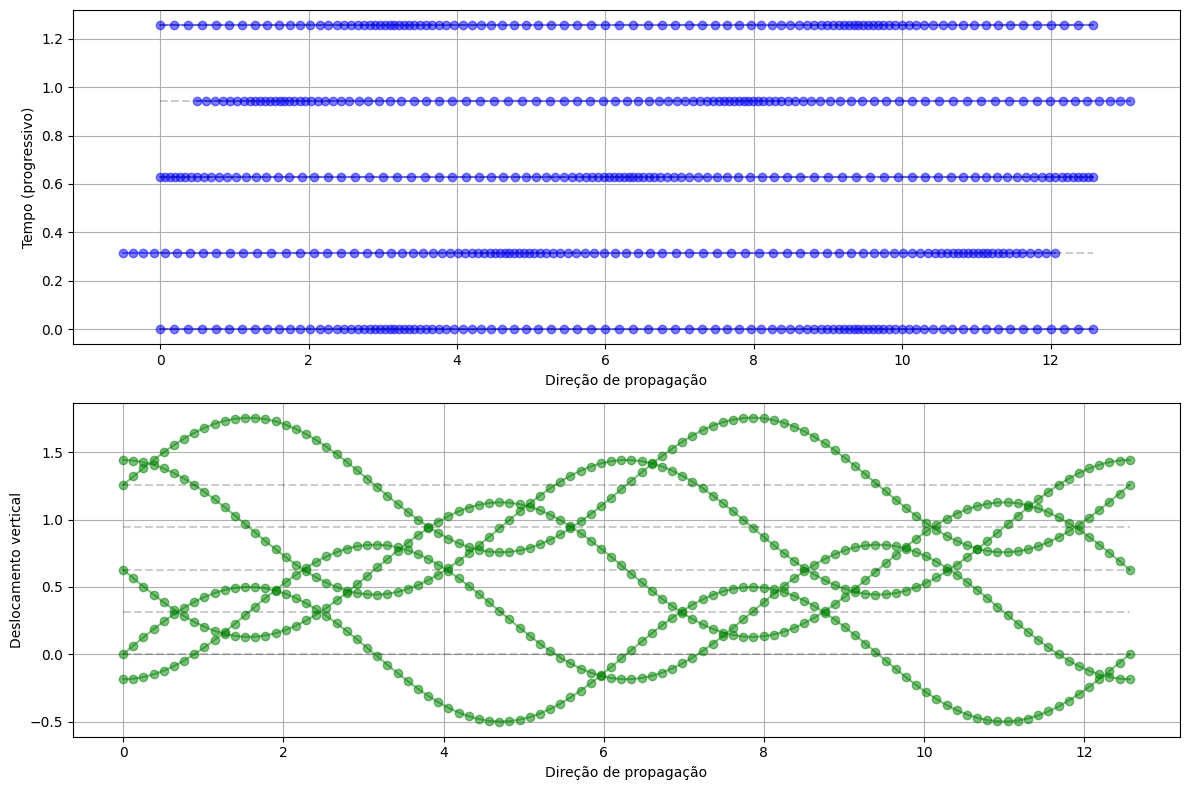

In [46]:

x = np.linspace(0, 4*np.pi, 100)
t = np.linspace(0, 2*np.pi, 5)  # Para animação estática

fig = plt.figure(figsize=(12, 8))

# Onda P (Longitudinal)
ax1 = fig.add_subplot(2, 1, 1)
for ti in t:
    # Partículas se movendo na mesma direção da propagação (eixo x)
    displacement = 0.5 * np.sin(x - ti)
    particle_positions = x + displacement
    ax1.plot(particle_positions, np.zeros_like(x) + ti/5, 'bo-', alpha=0.5)
    ax1.plot(x, np.zeros_like(x) + ti/5, 'k--', alpha=0.2)  # Posições de referência
ax1.set_ylabel('Tempo (progressivo)')
ax1.set_xlabel('Direção de propagação')
ax1.grid(True)

# Onda S (Transversal)
ax2 = fig.add_subplot(2, 1, 2)
for ti in t:
    # Partículas se movendo perpendicularmente à propagação (eixo y)
    displacement = 0.5 * np.sin(x - ti)
    ax2.plot(x, displacement + ti/5, 'go-', alpha=0.5)
    ax2.plot(x, np.zeros_like(x) + ti/5, 'k--', alpha=0.2)  # Linha de referência
ax2.set_ylabel('Deslocamento vertical')
ax2.set_xlabel('Direção de propagação')
ax2.grid(True)

plt.tight_layout()
# plt.savefig('ondas_p_s.png', dpi=300)
plt.show()